In [ ]:
import tensorflow as tensorf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
import platform
import math
import os

In [ ]:
import zipfile,os

In [ ]:
local_zip = '/content/drive/My Drive/File Rocks/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/My Drive/File Rocks/')
zip_ref.close()

base_dir = '/content/drive/My Drive/File Rocks/rockpaperscissors/rps-cv-images'


In [ ]:
os.listdir(base_dir)

['paper', 'rock', 'scissors', 'README_rpc-cv-images.txt']

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        shuffle=True,
        subset='training'
)
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
model = tensorf.keras.models.Sequential([
    tensorf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tensorf.keras.layers.MaxPooling2D(2, 2),
    tensorf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tensorf.keras.layers.MaxPooling2D(2,2),
    tensorf.keras.layers.MaxPooling2D(2,2),
    tensorf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tensorf.keras.layers.MaxPooling2D(2,2),
    tensorf.keras.layers.Flatten(),
    tensorf.keras.layers.Dense(512, activation='relu'),
    tensorf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tensorf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
training_history = model.fit(
      train_generator,
      steps_per_epoch=16, 
      epochs=15,
      validation_data=validation_generator, 
      validation_steps=4,  
      verbose=2)

Epoch 1/15
16/16 - 5s - loss: 1.0192 - accuracy: 0.5000 - val_loss: 1.0824 - val_accuracy: 0.5781
Epoch 2/15
16/16 - 6s - loss: 0.8308 - accuracy: 0.6875 - val_loss: 0.5896 - val_accuracy: 0.8281
Epoch 3/15
16/16 - 5s - loss: 0.5193 - accuracy: 0.8270 - val_loss: 0.4694 - val_accuracy: 0.8203
Epoch 4/15
16/16 - 5s - loss: 0.4113 - accuracy: 0.8509 - val_loss: 0.3402 - val_accuracy: 0.9062
Epoch 5/15
16/16 - 5s - loss: 0.3036 - accuracy: 0.9023 - val_loss: 0.2886 - val_accuracy: 0.9062
Epoch 6/15
16/16 - 5s - loss: 0.2532 - accuracy: 0.9160 - val_loss: 0.4301 - val_accuracy: 0.8359
Epoch 7/15
16/16 - 5s - loss: 0.2800 - accuracy: 0.8984 - val_loss: 0.1729 - val_accuracy: 0.9531
Epoch 8/15
16/16 - 5s - loss: 0.1288 - accuracy: 0.9609 - val_loss: 0.1360 - val_accuracy: 0.9453
Epoch 9/15
16/16 - 5s - loss: 0.1458 - accuracy: 0.9531 - val_loss: 0.0914 - val_accuracy: 0.9844
Epoch 10/15
16/16 - 5s - loss: 0.1329 - accuracy: 0.9622 - val_loss: 0.1292 - val_accuracy: 0.9609
Epoch 11/15
16/16 -

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

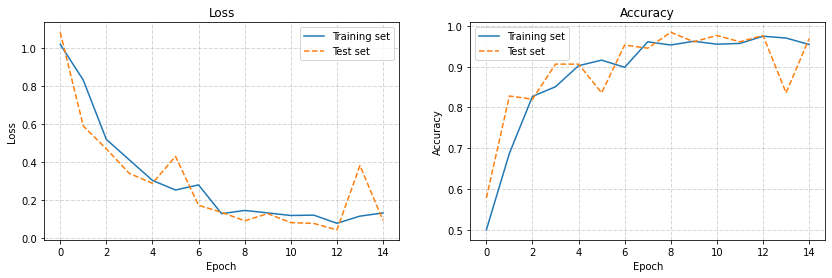

In [ ]:
render_training_history(training_history)

Saving 0NDYNEoDui7o64gU.png to 0NDYNEoDui7o64gU.png
0NDYNEoDui7o64gU.png
ini adalah batu


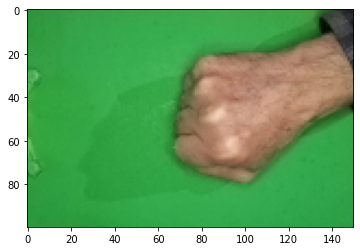

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('ini adalah kertas')
  elif classes[0][1]==1:
    print('ini adalah batu')
  elif classes[0][2]==1:
    print('ini adalah gunting')
  else:
    print('gambar engga terdeteksi')